In [72]:
#Pliki hydrologiczneze średnimi i ekstremami miesięcznymi zawierają w kolejnych polach następujące informacje:
#
#Kod stacji
#Nazwa stacji
#Nazwa rzeki/jeziora
#Rok hydrologiczny
#Wskaźnik miesiąca w roku hydrologicznym
#Wskaźnik ekstremum
#Stan wody [cm]
#Przepływ [m^3/s]
#Temperatura wody [st. C]
#Miesiąc kalendarzowy

#Pamiętaj, że rok hydrologiczny zaczyna się w listopadzie!

import pandas as pd
import numpy as np
%pip install chardet
import chardet
# Wczytanie pierwszych kilku bajtów pliku, aby sprawdzić kodowanie
with open('C:/Users/dzaja/OneDrive/Pulpit/Studia_DSAD/Projekt_zaliczeniowy/dane_hydrologiczne_msc/stany_wod.csv', 'rb') as f:
    raw_data = f.read(10000)  # Wczytuje pierwsze 10 KB danych
    result = chardet.detect(raw_data)  # Wykrywa kodowanie

print(result)  # Wyświetli kodowanie
#Wczytanie plku csv z kodowaniem polskich znaków (zgodnie ze źródłowymi plikami csv) oraz 'header = None'
#aby pd nie traktował pierwszego wiersza jako nagłówka (pliki źródłowe nie mają nagłówków)
data = pd.read_csv(
    'C:/Users/dzaja/OneDrive/Pulpit/Studia_DSAD/Projekt_zaliczeniowy/dane_hydrologiczne_msc/stany_wod.csv', 
                   encoding = 'Windows-1250', 
                   header = None)

#Przypisanie nazw kolumn
data.columns = ['station_nr', 'station', 'river', 'hydro_year', 'hydro_month', 'extremum', 'water_level', 
'water_flow', 'water_temp', 'month']
#Zamiana wartości oznaczające brak pomiaru, które zaburzyłyby dane
data['water_level'] = data['water_level'].replace(9999, np.nan)
data['water_flow'] = data['water_flow'].replace(99999.999, np.nan)
data['water_temp'] = data['water_temp'].replace(99.9, np.nan)

mean_data = data[data['extremum'] == 3]

#W wyniku podaje statystykę załadowaniej bazy
print(mean_data.describe())
#data.info()


{'encoding': 'MacRoman', 'confidence': 0.6971098901098901, 'language': ''}



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\dzaja\AppData\Local\Temp\ipykernel_11140\4263741070.py:28: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(


          hydro_year    hydro_month  extremum    water_level     water_flow  \
count  309574.000000  309574.000000  309574.0  307045.000000  248788.000000   
mean     2005.482121       6.486103       3.0     202.287303      54.218259   
std         9.835218       3.452375       0.0     130.234949     229.623855   
min      1990.000000       1.000000       3.0       0.000000       0.000000   
25%      1997.000000       3.000000       3.0     116.000000       1.860000   
50%      2005.000000       6.000000       3.0     170.000000       5.600000   
75%      2015.000000       9.000000       3.0     250.000000      20.700000   
max      2022.000000      12.000000       3.0    1140.000000    6980.000000   

         water_temp          month  
count  67325.000000  309574.000000  
mean      12.531577       6.497086  
std        7.271761       3.457284  
min        0.000000       1.000000  
25%        5.800000       3.000000  
50%       12.700000       6.000000  
75%       19.000000      10.0

In [26]:
#Tutaj stworzę nową kolumnę, gdzie obliczę jaki jest rok kalendarzowy na podstawie roku 
# i miesiąca hydrologicznego
# Początek roku hydrologicznego = Listopad
# Czyli w pierwszy miesiąc 2010 roku hydro = listopadowi 2009 itd.
# 03.2010 (hydro) = 01.2009
# Jeżeli hydro_month >= 3, to calendar_year = hydro_year, calendar_year = (hydro_year - 1)

def year(row):
    return row["hydro_year"] - 1 if row["hydro_month"] in [1,2] else row["hydro_year"]

mean_data = mean_data.assign(year=mean_data.apply(year, axis=1))
# Konwertowanie kolumny 'year' na typ całkowity
mean_data = mean_data.dropna(subset=['year'])
mean_data['year'] = mean_data['year'].astype(int)
#print(mean_data.describe())

In [74]:
#Eksport stworzonej bazy danych do plik csv
#"avg_stany_wod_cal_year.csv" -> Nazwa pliku, który zostanie zapisany.
#index=False -> Nie zapisuje dodatkowej kolumny z indeksami.
#encoding="latin-1" -> Zapewnia poprawne kodowanie polskich znaków.

mean_data.to_csv("avg_stany_wod_cal_year.csv", index=False, encoding="Windows-1250")

In [80]:
#Dane meteorologiczne opadów atmosferycznych sa kodowane w następujący sposób:
#Kod stacji                                        9
#Nazwa stacji                                     30
#Rok                                               4
#Miesiąc                                           2
#Miesięczna suma opadów [mm]                       8/1
#Status pomiaru SUMM                               1
#Liczba dni z opadem śniegu                        5
#Status pomiaru LDS                                1
#Opad maksymalny [mm]                              8/1
#Status pomiaru MAXO                               1
#Dzień pierwszy wystąpienia opadu maksymalnego     2
#Dzień ostatni wystąpienia opadu maksymalnego      2
#Liczba dni z pokrywą śnieżną                      5
#Status pomiaru LDPS                               1
#
#Status "8" brak pomiaru
#Status "9" brak zjawiska
#Liczba dni z pokrywą śnieżną nie jest wyliczana.

import pandas as pd
import numpy as np

data_precip = pd.read_csv(
    'C:/Users/dzaja/OneDrive/Pulpit/Studia_DSAD/Projekt_zaliczeniowy/dane_opady_msc/opady_msc.csv', 
                   encoding = 'Windows-1250',
                   header = None)

#Przypisanie nazw kolumn
data_precip.columns = ['station_nr', 'station', 'year', 'month', 'monthly_precip_sum', 'measure_status', 'snowfall_days', 'snowfall_status', 'max_precip', 'max_precip_status', 'first_day','last_day','days_with_snowlayer', 'status_layer']
#Wyrzucenie zbędnych kolumn
data_precip = data_precip.drop(['measure_status', 'snowfall_status', 'max_precip_status', 'first_day', 'last_day', 'status_layer', 'days_with_snowlayer'], axis = 1)

#Łącznie baz danych poprzez dopasowanie lewostronne na podstawie kolumn stacja, rok oraz miesiąc
data_merged = pd.merge(data_precip, mean_data, on = ['station', 'year', 'month'], how = 'inner')
#print(data_merged.describe())

#data_merged.to_csv('data_merged.csv', index = False, encoding= 'latin1')

#data_merged = data_merged.drop(['extremum', 'hydro_year', 'hydro_month', 'station_nr_y'], axis =1)

# Konwertowanie kolumny 'year' na typ całkowity
data_merged['year'] = data_merged['year'].astype(int)

#print(data_merged.describe())
#data_merged.to_csv('data_merged.csv', index = False, encoding= 'latin1')




C:\Users\dzaja\AppData\Local\Temp\ipykernel_11140\2260002382.py:24: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_precip = pd.read_csv(


KeyError: 'year'

<Axes: >

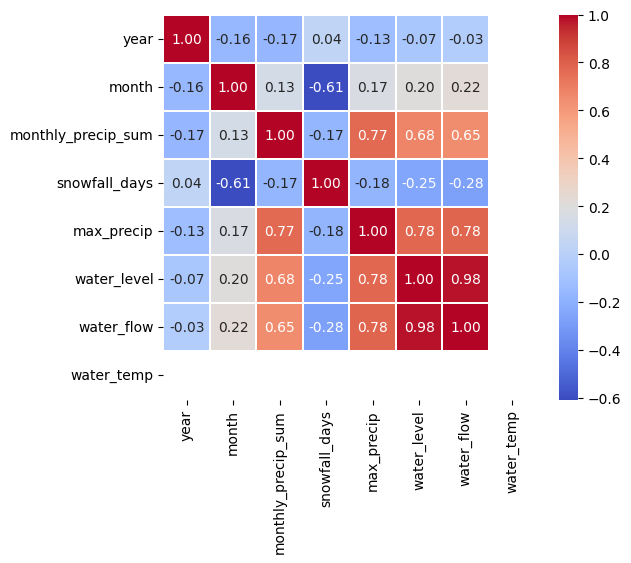

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
test_1 = data_merged[data_merged['station'] == "ISTEBNA"]

# Wybieranie tylko kolumn numerycznych
numeric_data = test_1.select_dtypes(include=['float64', 'int64'])

# Obliczanie korelacji na danych numerycznych
correlation_matrix = numeric_data.corr()
#print(correlation_matrix)

# Rozmiar wykresu
plt.figure(figsize=(6, 5))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.01)

In [ ]:
#Instalacja stream

#%pip install streamlit

In [ ]:
#%pip install chardet
#import chardet

#with open("C:/Users/dzaja/OneDrive/Pulpit/Studia_DSAD/Projekt_zaliczeniowy/dane_hydrologiczne_msc/data_merged.csv", 'rb') as f:
#    result = chardet.detect(f.read(100000))
#    print(result)  # pokaże wykryte kodowanie



In [ ]:
# stations = pd.read_csv("C:/Users/dzaja/OneDrive/Pulpit/Studia_DSAD/Projekt_zaliczeniowy/dane_hydrologiczne_msc/stacje.csv",
#                        encoding='ISO-8859-2')

# print(stations.head())

In [32]:
%pip install geopy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import csv
import time
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="myGeocoder")

def get_coordinates(station_name):
    retries = 3
    for _ in range(retries):
        try:
            location = geolocator.geocode(station_name, timeout=10)
            if location:
                return location.latitude, location.longitude
            return None, None
        except Exception as e:
            print(f"Error occurred while getting coordinates for {station_name}: {e}")
            time.sleep(2)  # Czekaj 2 sekundy przed ponowną próbą
    return None, None

def get_region(latitude, longitude):
    retries = 3  # Liczba prób
    for _ in range(retries):
        try:
            location = geolocator.reverse((latitude, longitude), language='pl', exactly_one=True, timeout=10)
            if location:
                address = location.raw.get('address', {})
                region = address.get('state', '')
                return region
            return None
        except Exception as e:
            print(f"Error occurred while getting region: {e}")
            time.sleep(2)  # Czekaj 2 sekundy przed ponowną próbą
    return None

with open('stacje.csv', mode='r', encoding='Windows-1250') as file:
    reader = csv.reader(file)
    # Zakładając, że w pierwszej kolumnie znajdują się nazwy stacji
    for row in reader:
        station_name = row[0]  
        latitude, longitude = get_coordinates(station_name)
        
        if latitude and longitude:
            region = get_region(latitude, longitude)
            print(f"Stacja: {station_name}, Szerokość: {latitude}, Długość: {longitude}, Województwo: {region}")


Stacja: station, Szerokość: 60.1717794, Długość: 24.9413548, Województwo: Uusimaa
Stacja: KOŹLE, Szerokość: 50.3358594, Długość: 18.1444165, Województwo: województwo opolskie
Stacja: BRZEG, Szerokość: 50.8588648, Długość: 17.4641245, Województwo: województwo opolskie
Stacja: BRZEG DOLNY, Szerokość: 51.2691744, Długość: 16.7083805, Województwo: województwo dolnośląskie
Stacja: KOSTRZYN NAD ODRĄ, Szerokość: 52.5898737, Długość: 14.6536335, Województwo: województwo lubuskie
Stacja: GOZDOWICE, Szerokość: 52.765851, Długość: 14.3223027, Województwo: województwo zachodniopomorskie
Stacja: WIDUCHOWA, Szerokość: 50.4852832, Długość: 20.7923885, Województwo: województwo świętokrzyskie
Stacja: BRANICE, Szerokość: 49.4024637, Długość: 14.339536, Województwo: Południowo-zachodni
Stacja: ISTEBNA, Szerokość: 49.5748339, Długość: 18.8935401, Województwo: województwo śląskie
Stacja: CIESZYN, Szerokość: 49.7488623, Długość: 18.6334308, Województwo: województwo śląskie
Stacja: GOŁKOWICE, Szerokość: 51.1

In [45]:
import csv
import time
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="myGeocoder")

def get_coordinates(station_name):
    retries = 3
    for _ in range(retries):
        try:
            location = geolocator.geocode(station_name, timeout=10)
            if location:
                return location.latitude, location.longitude
            return None, None
        except Exception as e:
            print(f"Error occurred while getting coordinates for {station_name}: {e}")
            time.sleep(2)  # Czekaj 2 sekundy przed ponowną próbą
    return None, None

def get_region(latitude, longitude):
    retries = 3  # Liczba prób
    for _ in range(retries):
        try:
            location = geolocator.reverse((latitude, longitude), language='pl', exactly_one=True, timeout=10)
            if location:
                address = location.raw.get('address', {})
                region = address.get('state', '')
                return region
            return None
        except Exception as e:
            print(f"Error occurred while getting region: {e}")
            time.sleep(2)  # Czekaj 2 sekundy przed ponowną próbą
    return None

with open('stacje.csv', mode='r', encoding='Windows-1250') as file:
    reader = csv.reader(file)
    # Zakładając, że w pierwszej kolumnie znajdują się nazwy stacji
    for row in reader:
        station_name = row[0]  
        latitude, longitude = get_coordinates(station_name)
        
        if latitude and longitude:
            region = get_region(latitude, longitude)
            print(f"Stacja: {station_name}, Szerokość: {latitude}, Długość: {longitude}, Województwo: {region}")


Stacja: station, Szerokość: 60.1717794, Długość: 24.9413548, Województwo: Uusimaa
Stacja: KOŹLE, Szerokość: 50.3358594, Długość: 18.1444165, Województwo: województwo opolskie
Stacja: BRZEG, Szerokość: 50.8588648, Długość: 17.4641245, Województwo: województwo opolskie
Stacja: BRZEG DOLNY, Szerokość: 51.2691744, Długość: 16.7083805, Województwo: województwo dolnośląskie
Stacja: KOSTRZYN NAD ODRĄ, Szerokość: 52.5898737, Długość: 14.6536335, Województwo: województwo lubuskie
Stacja: GOZDOWICE, Szerokość: 52.765851, Długość: 14.3223027, Województwo: województwo zachodniopomorskie
Stacja: WIDUCHOWA, Szerokość: 50.4852832, Długość: 20.7923885, Województwo: województwo świętokrzyskie
Stacja: BRANICE, Szerokość: 49.4024637, Długość: 14.339536, Województwo: Południowo-zachodni
Stacja: ISTEBNA, Szerokość: 49.5748339, Długość: 18.8935401, Województwo: województwo śląskie
Stacja: CIESZYN, Szerokość: 49.7488623, Długość: 18.6334308, Województwo: województwo śląskie
Stacja: GOŁKOWICE, Szerokość: 51.1

In [46]:
# Wczytanie pliku CSV z kodowaniem latin-1
import csv
import time

with open('stacje.csv', mode='r', encoding='Windows-1250') as infile:
    reader = csv.reader(infile)
    headers = next(reader)  # Zakładając, że pierwsza linia to nagłówki
    headers.append('Województwo')  # Dodajemy nową kolumnę 'Województwo'

    with open('stacje_z_wojewodztwem.csv', mode='w', newline='', encoding='Windows-1250') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(headers)  # Zapisz nagłówki

        # Przetwarzanie każdej stacji
        for row in reader:
            station_name = row[0]  # Zakładając, że nazwa stacji jest w pierwszej kolumnie
            latitude, longitude = get_coordinates(station_name)
            
            if latitude and longitude:
                region = get_region(latitude, longitude)
                row.append(latitude)  # Dodajemy szerokość geograficzną
                row.append(longitude)  # Dodajemy długość geograficzną
                row.append(region)  # Dodajemy województwo
            else:
                row.append(None)  # Jeśli nie udało się znaleźć współrzędnych, dodajemy None
                row.append(None)  # Długość geograficzna
                row.append(None)  # Województwo

In [47]:
# Przetwarzanie i zapis do nowego pliku
with open('stacje.csv', mode='r', encoding='Windows-1250') as infile, \
     open('stacje_z_danymi.csv', mode='w', newline='', encoding='Windows-1250') as outfile:

    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    headers = next(reader)
    headers.extend(['Szerokość', 'Długość', 'Województwo'])  # Dodajemy nowe kolumny
    writer.writerow(headers)

    for row in reader:
        station_name = row[0]
        latitude, longitude = get_coordinates(station_name)

        if latitude and longitude:
            region = get_region(latitude, longitude)
            print(f"Stacja: {station_name}, Szer.: {latitude}, Dł.: {longitude}, Województwo: {region}")
            row.extend([latitude, longitude, region])
        else:
            row.extend([None, None, None])

        writer.writerow(row)

Stacja: KOŹLE, Szer.: 50.3358594, Dł.: 18.1444165, Województwo: województwo opolskie
Stacja: BRZEG, Szer.: 50.8588648, Dł.: 17.4641245, Województwo: województwo opolskie
Stacja: BRZEG DOLNY, Szer.: 51.2691744, Dł.: 16.7083805, Województwo: województwo dolnośląskie
Stacja: KOSTRZYN NAD ODRĄ, Szer.: 52.5898737, Dł.: 14.6536335, Województwo: województwo lubuskie
Stacja: GOZDOWICE, Szer.: 52.765851, Dł.: 14.3223027, Województwo: województwo zachodniopomorskie
Stacja: WIDUCHOWA, Szer.: 50.4852832, Dł.: 20.7923885, Województwo: województwo świętokrzyskie
Stacja: BRANICE, Szer.: 49.4024637, Dł.: 14.339536, Województwo: Południowo-zachodni
Stacja: ISTEBNA, Szer.: 49.5748339, Dł.: 18.8935401, Województwo: województwo śląskie
Stacja: CIESZYN, Szer.: 49.7488623, Dł.: 18.6334308, Województwo: województwo śląskie
Stacja: GOŁKOWICE, Szer.: 51.1373081, Dł.: 18.1998348, Województwo: województwo opolskie
Stacja: RYBNIK, Szer.: 50.0955793, Dł.: 18.5419933, Województwo: województwo śląskie
Stacja: TWORÓG

In [71]:
stations = pd.read_csv("C:/Users/dzaja/OneDrive/Pulpit/Studia_DSAD/Projekt_zaliczeniowy/stations.csv",
                       encoding="Windows-1250")

def obszar(lat):
     if lat > 54.00000:
        return "Nadmorski"
     elif 54.9999 >= lat >= 52.5000:
        return "Pojezierza"
     elif 52.49000 >= lat >= 51.5000:
        return "Nizinny"
     elif 51.49000 >= lat >= 49.5000:
         return "Wyzynny"
     else:
         return "Górski"
     
stations['obszar'] = stations['lat'].apply(obszar)

stations.to_csv("stations_full.csv", index=False, encoding='windows-1250')






In [13]:
#Tutaj połączę bazę stations z bazą danych pomiarowych - do wykorzystania w III sekcji projektu - Analiza przestrzenna
#Łącznie baz danych poprzez dopasowanie lewostronne na podstawie kolumn stacja, rok oraz miesiąc
#spatial_data = pd.merge(data_merged, stations, on = ['station'], how = 'left')
print(spatial_data.columns)
spatial_data.to_csv('spatial_data.csv', index=False)

Index(['station_nr_x', 'station', 'year', 'month', 'monthly_precip_sum',
       'snowfall_days', 'max_precip', 'river', 'water_level', 'water_flow',
       'water_temp', 'lat', 'lon', 'state', 'obszar'],
      dtype='object')


In [ ]:
%pip install folium

In [70]:
import folium
#  Tworzymy mapę z domyślnym centrum (np. na szerokości 52.0, długości 19.0)
m = folium.Map(location=[52.0, 19.0], zoom_start=6)

stations_m = stations.dropna(subset=['lat', 'lon'])
for i, row in stations_m.iterrows():
    popup_text = f"<b>Nazwa stacji:</b> {row['station']}<br><b>Region:</b> {row['obszar']}"
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=popup_text
    ).add_to(m)

m.save("mapa_stacji.html")

In [118]:
%pip install streamlit-folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
